In [42]:
import csv
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Flatten, LSTM, Dropout, Activation, Embedding, Bidirectional
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


Data Preprocessing

In [43]:
#remove punctuation
def remove_punc(input):
    characters = "!_;':,.?+|`"

    # Replace each character with an empty string
    for char in characters:
        input = input.replace(char, '')

    return input

In [44]:
with open('nursery_rhymes.txt', 'r') as rhymes:
    rhymes = rhymes.readlines()

#sourced from https://www.geeksforgeeks.org/python-string-strip-2/
rhyme_word = []
for line in rhymes:
    if line.strip(): #removes the leading and trailing spaces
        rhyme_word.append(line.strip().lower()) #lower case

#print(rhyme_word)
cleaned_rhymes = [remove_punc(string) for string in rhyme_word]
cleaned_rhymes



['the queen of hearts',
 'the queen of hearts she made some tarts',
 'all on a summers day',
 'the knave of hearts he stole those tarts',
 'and took them clean away',
 'the king of hearts called for those tarts',
 'and beat the knave full sore',
 'the knave of hearts brought back those tarts',
 'and vowed hed steal no more',
 'saint swithins day',
 'st swithins day if thou dost rain',
 'for forty days it will remain',
 'st swithins day if thou be fair',
 'for forty days t will rain no more',
 'dance to your daddie',
 'dance to your daddie',
 'my bonnie laddie',
 'dance to your daddie my bonnie lamb',
 'you shall get a fishie',
 'on a little dishie',
 'you shall get a fishie when the boat comes hame',
 'dance to your daddie',
 'my bonnie laddie',
 'dance to your daddie and to your mammie sing',
 'you shall get a coatie',
 'and a pair of breekies',
 'you shall get a coatie when the boat comes in',
 'the man in the moon',
 'the man in the moon',
 'came tumbling down',
 'and asked the way 

In [45]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))


#remove all the stopwords
filtered_rhymes = []
for sentence in cleaned_rhymes:
    words = sentence.split()
    #print(words)
    filtered_sentence = ' '.join([word for word in words if word not in STOPWORDS])
    filtered_rhymes.append(filtered_sentence)

print(filtered_rhymes)
#print(len(filtered_rhymes))



['queen hearts', 'queen hearts made tarts', 'summers day', 'knave hearts stole tarts', 'took clean away', 'king hearts called tarts', 'beat knave full sore', 'knave hearts brought back tarts', 'vowed hed steal', 'saint swithins day', 'st swithins day thou dost rain', 'forty days remain', 'st swithins day thou fair', 'forty days rain', 'dance daddie', 'dance daddie', 'bonnie laddie', 'dance daddie bonnie lamb', 'shall get fishie', 'little dishie', 'shall get fishie boat comes hame', 'dance daddie', 'bonnie laddie', 'dance daddie mammie sing', 'shall get coatie', 'pair breekies', 'shall get coatie boat comes', 'man moon', 'man moon', 'came tumbling', 'asked way norwich', 'went south', 'burnt mouth', 'eating cold pease porridge', 'simple simon', 'simple simon met pie-man', 'going fair', 'says simple simon pie-man', '"let taste ware"', 'says pie-man unto simon', '"first give penny"', 'says simple simon pie-man', '"i got any"', 'went catch dicky-bird', 'thought could fail', 'got little salt

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rubylink/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [46]:
oov_tok = '<OOV>' # OOV = Out of Vocabulary

token = Tokenizer(oov_token=oov_tok)
token.fit_on_texts(filtered_rhymes)

token_rhymes = token.texts_to_sequences(filtered_rhymes)
print(token_rhymes) 

[[109, 413], [109, 413, 25, 499], [874, 27], [634, 413, 134, 499], [71, 500, 19], [66, 413, 213, 499], [135, 634, 191, 875], [634, 413, 635, 37, 499], [501, 636, 637], [1293, 638, 27], [214, 638, 27, 94, 876, 502], [639, 215, 1294], [214, 638, 27, 94, 192], [639, 215, 502], [72, 414], [72, 414], [640, 641], [72, 414, 640, 642], [10, 30, 877], [2, 1295], [10, 30, 877, 878, 250, 643], [72, 414], [640, 641], [72, 414, 1296, 15], [10, 30, 879], [283, 1297], [10, 30, 879, 878, 250], [11, 193], [11, 193], [12, 644], [645, 168, 1298], [3, 880], [503, 646], [504, 339, 1299, 1300], [284, 110], [284, 110, 73, 57, 11], [77, 192], [6, 284, 110, 57, 11], [95, 1301, 1302], [6, 57, 11, 647, 110], [648, 78, 118], [6, 284, 110, 57, 11], [169, 41, 1303], [3, 285, 1304, 216], [286, 58, 1305], [41, 2, 1306], [45, 59, 136], [3, 119, 1307, 34], [41, 2, 340], [649, 59, 415], [25, 881, 882], [284, 110, 3, 26, 650], [285, 883], [884, 651, 652], [58, 150, 7], [3, 120, 217], [885, 416], [251, 505, 341], [46, 41]

In [47]:
vocab_size = len(token.word_counts) # make the top list of words (common words)
print(vocab_size)
embedding_dim = 50
max_length = 20
trunc_type = 'pre'
padding_type = 'pre'

2320


In [48]:
input_rhymes = pad_sequences(token_rhymes, maxlen=max_length, padding=padding_type)
print(input_rhymes) 

print(len(input_rhymes))

[[   0    0    0 ...    0  109  413]
 [   0    0    0 ...  413   25  499]
 [   0    0    0 ...    0  874   27]
 ...
 [   0    0    0 ...   14  116  239]
 [   0    0    0 ...    0   13  816]
 [   0    0    0 ...    0 1292  832]]
2959


In [49]:
X = input_rhymes[:, :-1]
y = input_rhymes[:, -1]
print(X.shape)
print(y.shape)
#print(y)
y = to_categorical(y, num_classes = vocab_size + 2)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100, shuffle = True)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)



(2959, 19)
(2959,)
(2959, 2322)
(2367, 19)
(2367, 2322)
(592, 19)


Model

In [50]:
look_back = 10

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim= 30, input_length= 19))
#model.add(Embedding(vocab_size, embedding_dim))
#model.add(LSTM(128, input_shape=(1, look_back)))
model.add(LSTM(128, input_shape=(1, look_back)))
model.add(Dense(vocab_size +2, activation='relu'))  # Output layer with softmax activation for next word prediction
#model.add(LSTM(128, return_sequences=True))  # LSTM layer with 128 units
model.add(Dense(vocab_size +2, activation='softmax'))  # Output layer with softmax activation for next word prediction

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=30, batch_size=32)



Epoch 1/30
74/74 [==============================] - 7s 52ms/step - loss: 7.4715 - accuracy: 0.0059 - val_loss: 7.2956 - val_accuracy: 0.0101
Epoch 2/30
74/74 [==============================] - 3s 39ms/step - loss: 6.7918 - accuracy: 0.0101 - val_loss: 7.2950 - val_accuracy: 0.0034
Epoch 3/30
74/74 [==============================] - 3s 39ms/step - loss: 6.5609 - accuracy: 0.0123 - val_loss: 7.4741 - val_accuracy: 0.0152
Epoch 4/30
74/74 [==============================] - 2s 30ms/step - loss: 6.3860 - accuracy: 0.0237 - val_loss: 7.5133 - val_accuracy: 0.0186
Epoch 5/30
74/74 [==============================] - 2s 27ms/step - loss: 6.2218 - accuracy: 0.0287 - val_loss: 7.6984 - val_accuracy: 0.0287
Epoch 6/30
74/74 [==============================] - 2s 28ms/step - loss: 6.0685 - accuracy: 0.0376 - val_loss: 7.6557 - val_accuracy: 0.0338
Epoch 7/30
74/74 [==============================] - 5s 69ms/step - loss: 5.8826 - accuracy: 0.0427 - val_loss: 7.9111 - val_accuracy: 0.0490
Epoch 8/30
74

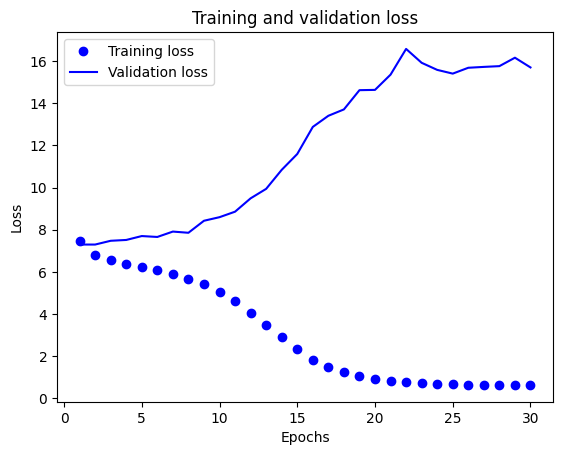

In [51]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

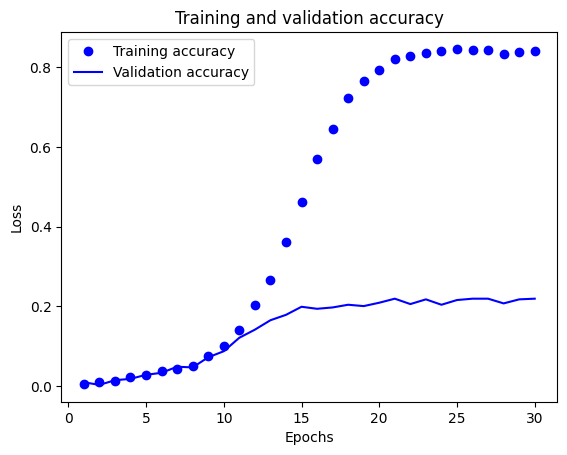

In [52]:
history_dict = history.history
accuracy_values = history_dict["accuracy"]
val_acc_values = history_dict["val_accuracy"]
epochs = range(1, len(accuracy_values) + 1)
plt.plot(epochs, accuracy_values, "bo", label="Training accuracy")
plt.plot(epochs, val_acc_values, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Generate New Rhyme

In [54]:
def gen_rhyme(input_text, num_lines, num_words):
    rhyme = []
    for i in range(num_words):  #number of words
        output_text = []
        for j in range(num_lines): #number of line
            tok_seq = token.texts_to_sequences([input_text]) #tokenize
            processed_seq = pad_sequences(tok_seq, maxlen=19, padding='pre') #pad sequences
            y_pred = np.argmax(model.predict(processed_seq), axis=-1)#store indices of pred words w/ highest prob
            predicted_word = ""
            for word, index in token.word_index.items(): #word in tokenized vocab matches predicted 
                if index == y_pred:
                    predicted_word = word
                    break #if it is found, stop looking
            input_text = input_text + ' ' + predicted_word #add this word to the rhyme
            output_text.append(predicted_word)
        input_text = output_text[-1] #new input  
        output_text = ' '.join(output_text) # combines words into single string
        rhyme.append(output_text)
    #print out the rhymes
    for word in rhyme:
        print (word, end= " ")
        print("\n")
    
        

    
# Call the function with necessary arguments
gen_rhyme("jack and jill went up the hill to fetch", 20, 30)


1/1 [==============================] - 0s 16ms/step
ho ho ding ding shearing remain lang i gave brown hearing diet brown brown vilent vilent brown vilent hearing dairy 

come hat hat hat marry marry fair ho cock ding ding ding long slit nice gave gave gave gave brown 

blood land word hearing hearing fried hearing try pandy listened wander fair cow night flew ground full full glow wear 

sea first hat hat hay beat cow cow quoth quoth horse nay nay crow dog maccaroni news stall bess gave 

dust dust pan hog ox dumpty stile simon simon simon goose house bow fell joan joan ow ow ow ow 

door nail mile dance nay do well news that wear gave trees trees half miss ives gone gone mice mice 

evil sun half gown spoon spoon gone gone ride ride ride buns grandmother matter tied hame hame drink king mile 

away swine hog hog hog frog frog prick prick come hat hat marry marry maid gone can malt malt malt 

got side night side side drink drink mine school swine bark bark knight laugh knee fine son h